# Socio-economic Factors. 
  
The goal of this case study is to learn the growth of the state of an economy from the dataset that contains various socio-economic attributes for countries around the world. To identify the clusters of country with certian similar in socio-economic factors.

## **Data Dictionary**
-------------------------
The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita

In the dataset, we will not do clustering on the GDP. We will rather try to understand the variation of other factors with GDP across the groups that we get.

In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To scale the data using z-score 
#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
from sklearn.preprocessing import StandardScaler

#Importing clustering algorithm
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score
#Metrics are quantitative assessment 

import warnings
warnings.filterwarnings("ignore")


# Loading the data

In [3]:
data = pd.read_csv('Country-data.csv')
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* There are 167 observations of 10 features.  
* There are 167 non-null values, so there are no missing values
* Only the country name column that is not a numerical data

# EDA

**Check duplicate entries**

In [5]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


* There are no duplicate observation

## Summary statistics

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


### Observation. 
* Child motality rate has big range from 2.6 to 208 death per 1000 live birth.  
* The import and export also have a high range of value.

child_mort
Skew: 1.45


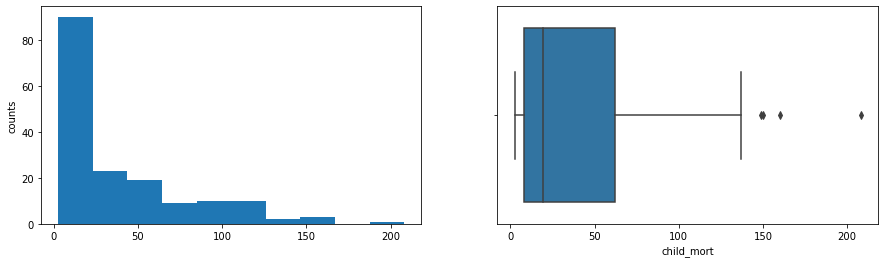

exports
Skew: 2.45


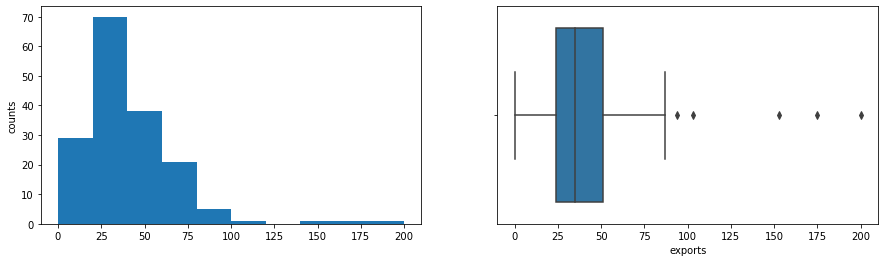

health
Skew: 0.71


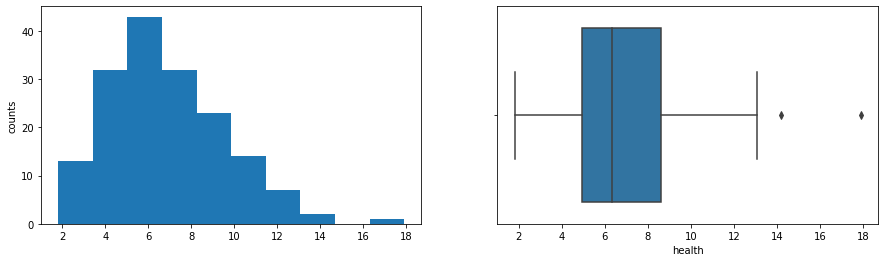

imports
Skew: 1.91


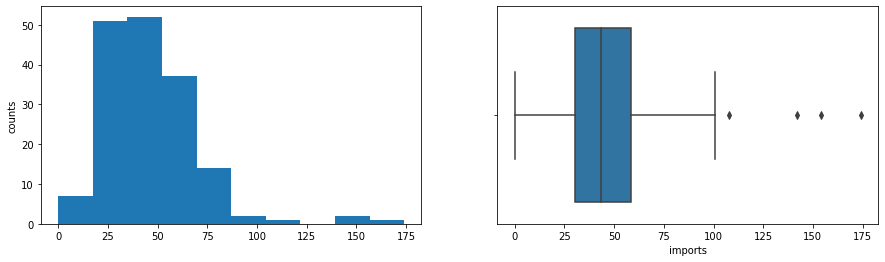

income
Skew: 2.23


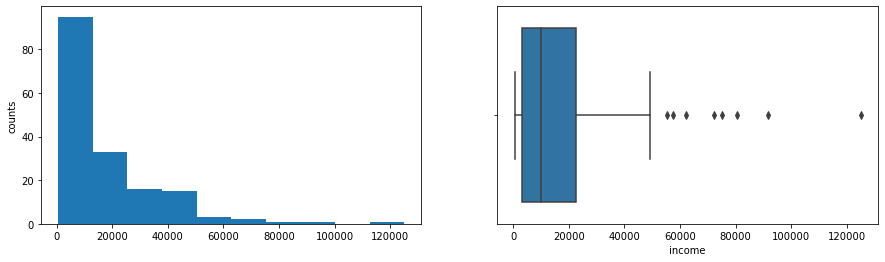

inflation
Skew: 5.15


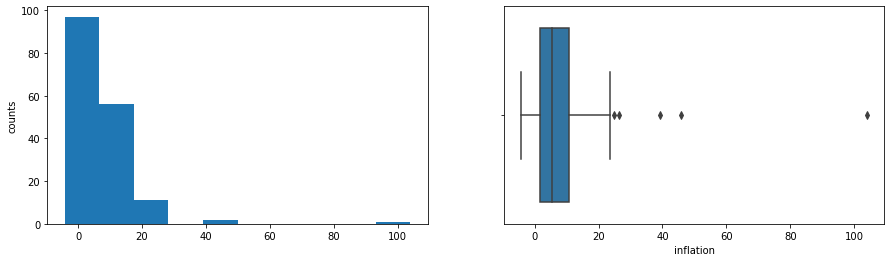

life_expec
Skew: -0.97


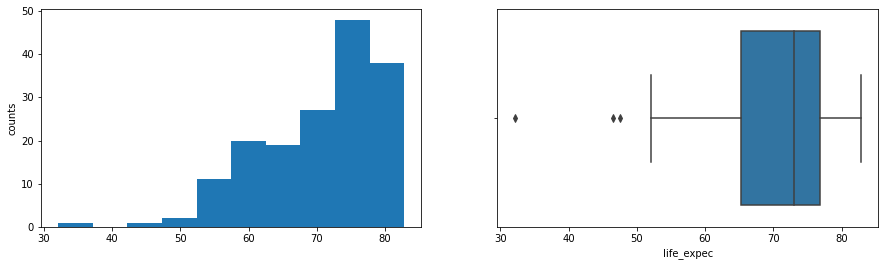

total_fer
Skew: 0.97


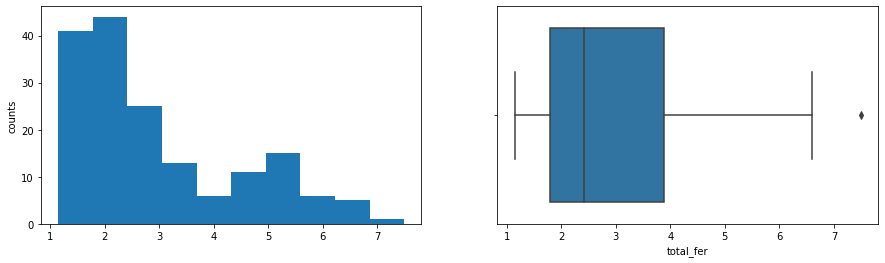

gdpp
Skew: 2.22


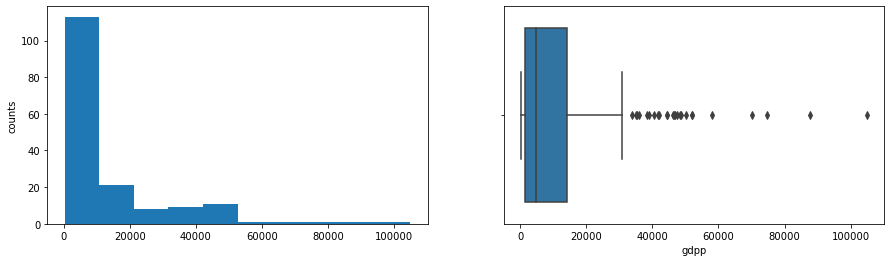

In [7]:
#Check distribution and outlier 
for col in data.columns[1:]:
    print(col)
    print('Skew:', round(data[col].skew(), 2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1) 
    data[col].hist(bins=10, grid=False)
    plt.ylabel('counts')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

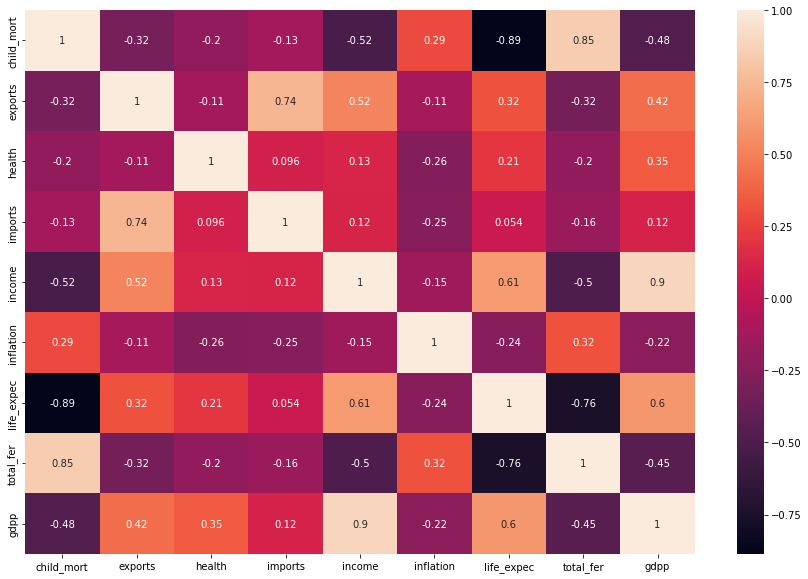

In [8]:
#Check the correlation among each variables
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Observation  
* Child mortality and negatively correlated with life expectency, and income and positively correlated with total fertallity rate. 
* There is a strong positive correlation of gdpp and income


## Scaling the data. 
Clustering are the distance based algorithms, which affected by scale of the variables. So, we should scale data before applying clustering method

In [9]:
#Find unique value in country column
data.country.nunique()

167

* All countries have unique name, so it would not add value to our analysis. We should then drop the country columns.  
* The gdpp will also be dropped because we want to identify cluster of countries without relying on GDP and see later if these corresponding to an average GDP value for the countrie in each cluster 

In [10]:
new_data = data.drop(['country', 'gdpp'], axis=1)
new_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13


In [11]:
#Scaling datat
scaler = StandardScaler()

#Put scale_data in dataframe
scale_data = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
scale_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [12]:
#Creating a copy of data to store labels from each algorithm
scale_data_copy = scale_data.copy(deep = True)

## K-Means Clustering  
Using centroid (geometric center) of cluster to determine cluster that K-means find in dataset.  
Number of K clustering should be assigned before method by using ELBOW method. For each value of k, we can calculate the sum of squared distance between centroids and the data points for each cluster, and do summation of all clusters. (Within cluster sum of square, WCSS)

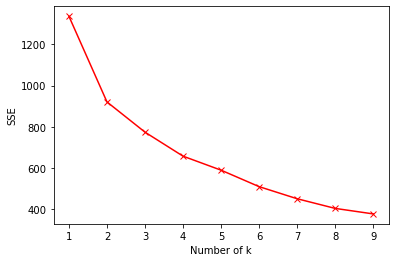

In [13]:
#Create empty dictionary to calculate sum of square error (SSE)
sse = {}

#Iterate for a range of Ks and fit scaled data to the algorithm
#Used inertia attribute from the clustering object and store the
#inertia value for that k

for k in range(1,10): #experiment of k from 1 to 10
    kmeans = KMeans(n_clusters = k, random_state=1).fit(scale_data)
    sse[k] = kmeans.inertia_ #Extrack sum of square error

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-', color='red')
plt.xlabel('Number of k')
plt.ylabel('SSE')
plt.show()

* There are no clear elbow between k = 2 to 8

**Another method to find the number of k is Silhouette score**  
It is a metric use to calculate the goodness of a clustering technique

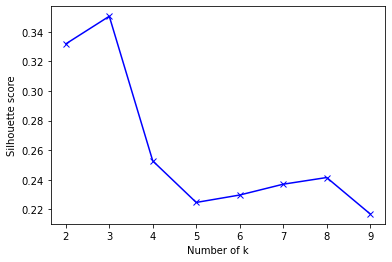

In [14]:
# Create empty dictionary
sc = {}

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scale_data)
    labels = kmeans.predict(scale_data)
    sc[k] = silhouette_score(scale_data, labels)

    #Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel('Number of k')
plt.ylabel('Silhouette score')
plt.show()

* k=3 has the highest score

In [15]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(scale_data)

#Adding predicted labels to original data and scaled data
scale_data_copy['KMeans_Labels'] = kmeans.predict(scale_data)
data['KMeans_Labels'] = kmeans.predict(scale_data)

In [16]:
data['KMeans_Labels'].value_counts()

0    112
1     52
2      3
Name: KMeans_Labels, dtype: int64

**This looks like skewed clustering with only 3 observation in one cluster and 112 in another cluster**

In [17]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [18]:
#Checking mean and medien of each cluster
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T


,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36
gdpp,16937.535714,1832.884615,57566.666667,8580.000,932.00,46600.00


### Observation. 
* Cluster 1 has the highes child mortality rate and also have the lowest income and lowest gdpp. 
* Cluster 2 belong to a cluster with highest exports, imports, income, life expectency , and gdpp.  
* Cluster 0 has the highest number of counts of 112. They are developing countries, which are more than highly developed one.

### Visualize the summary statistics of these clusters below

In [19]:
data_new = data.drop(columns='country')
data_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


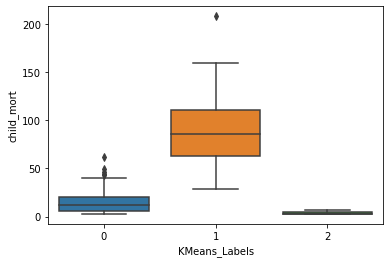

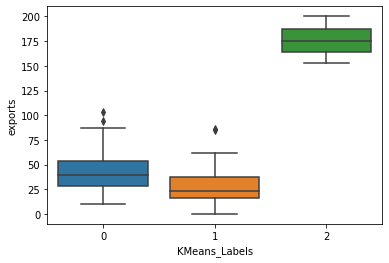

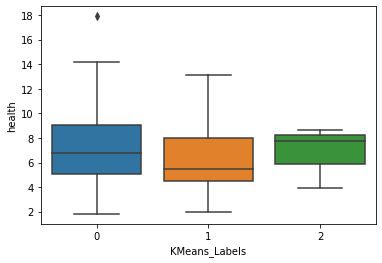

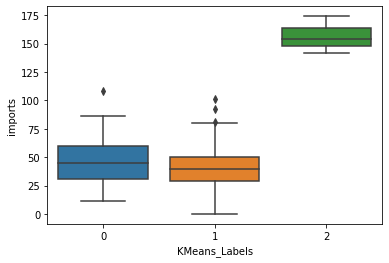

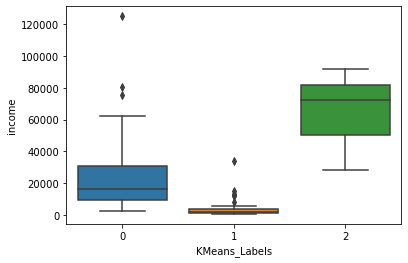

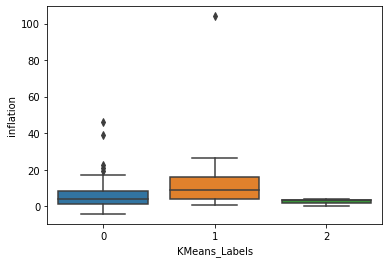

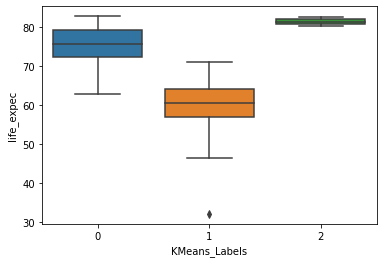

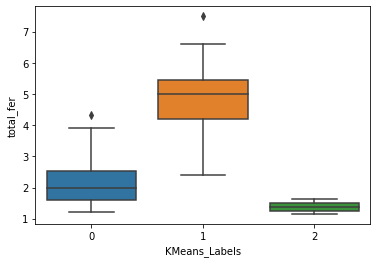

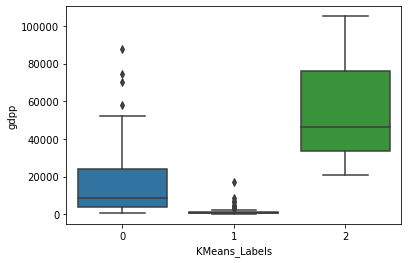

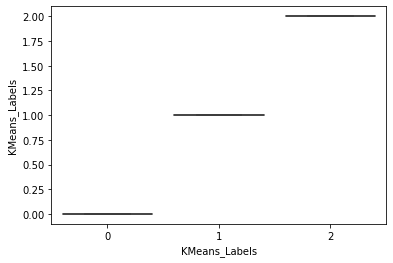

In [20]:
cols = data_new.columns
for col in cols:
    sns.boxplot(x='KMeans_Labels',y=col, data=data_new)
    plt.show()

### Observation. 
* Cluster 2 with only 3 observations has the highest exports, import, income and life expentency, which are related to high GDP. This group consists of outlier high income country  
* Cluster 1 if for the undeveloped countries as they have almost all the lowest features compared to cluster 0 and 2. 
* Cluster 0 is the majority of all the countries that are developing. 
* However, the number of countries in each cluster are not balanced. So we should try out other algorithm

In [21]:
#Validate if these three clusters related well with GDP of the country

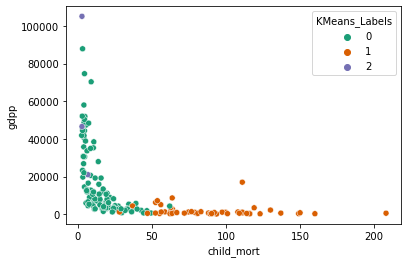

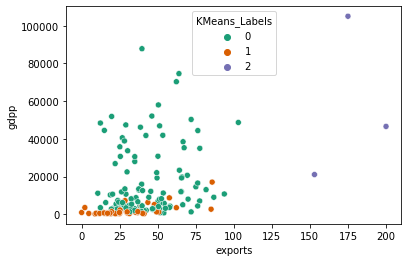

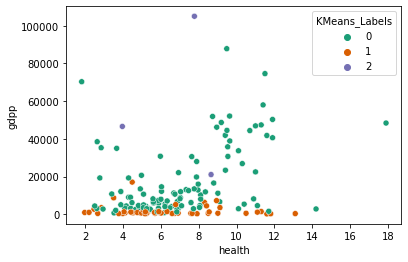

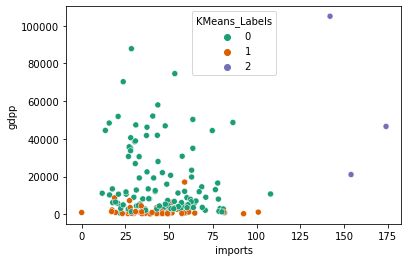

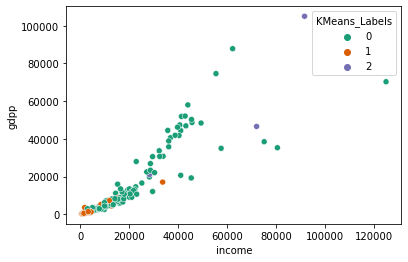

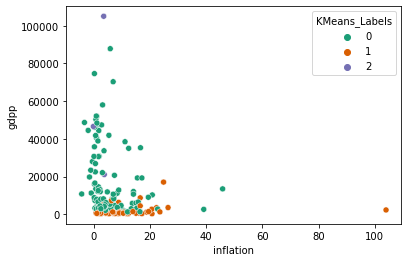

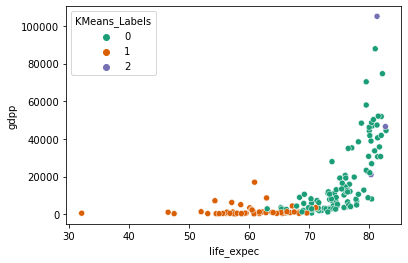

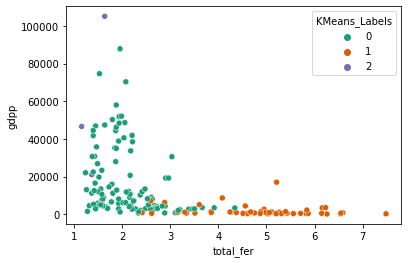

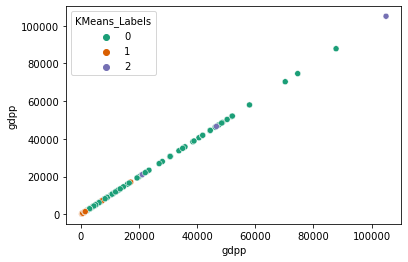

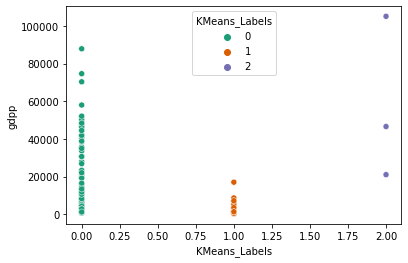

In [22]:
for col in cols:
    sns.scatterplot(x=col, y='gdpp',data=data_new, hue='KMeans_Labels', palette = 'Dark2')
    
    plt.show()

* The countrie with higher child motality rate have lower GDP, so they are negatively correlated. 
* There are positive correlation between income and GDP. The higher the income the higher the GDP.
* More inflation, lower GDP.
* Higher lif expectensy, higher GDP.  
* Higher total fertility rate, higher population with lower GDP.

# K-Medoids Clustering. 
To avoide the impact of outliers. K-Medoids uses the medians or actual observations from data as cluster center (centroid). 

In [23]:
kmedo = KMedoids(n_clusters=3, random_state=1)
kmedo.fit(scale_data)

KMedoids(n_clusters=3, random_state=1)

In [24]:
#Add K-medoids in original data and scale_data
scale_data_copy['kmedoLabels'] = kmedo.predict(scale_data)
data['kmedoLabels'] = kmedo.predict(scale_data)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [25]:
data.kmedoLabels.value_counts()

1    75
2    58
0    34
Name: kmedoLabels, dtype: int64

There are 75 counts for cluster 1 and 34 counts for cluster 0 with the middle counts are in cluster 2

In [26]:
#Calculating mean and median of each features for each cluster
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean,median], axis=0)
df_kmedoids.index =['group_0_mean','group_1_mean','group_2_mean','group_0_median','group_1_median','group_2_median']
df_kmedoids.T

,group_0_mean,group_1_mean,group_2_mean,group_0_median,group_1_median,group_2_median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000
KMeans_Labels,0.000000,0.080000,0.896552,0.000,0.00,1.000


### Observation. 
* Group 0 has the highest average income with the lowest child mortality rate, better health, lowest inflation, and highest GDP.  
* Group 2 represent the poor countries with the lowest average income, highest child mortality rate, lowest health, highest inflation, lowest life expectency, highest total fertility, and lowest GDP.  
* Group 1 is for the counstries that are developing, which is the biggest cluster.

In [27]:
#Visualize 5 summary in boxplot
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


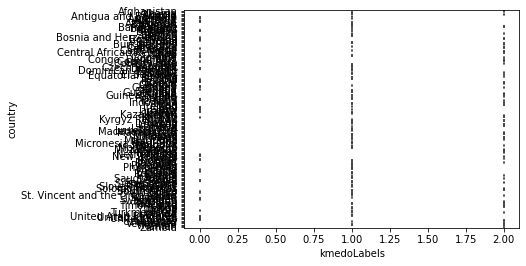

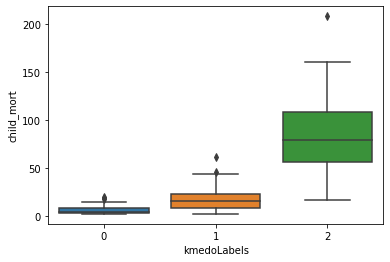

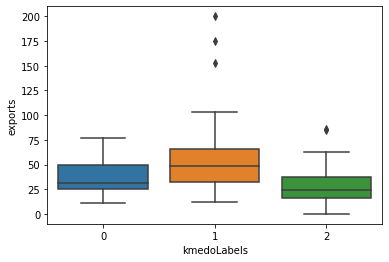

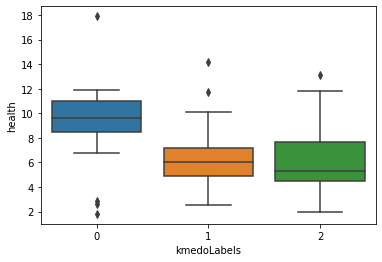

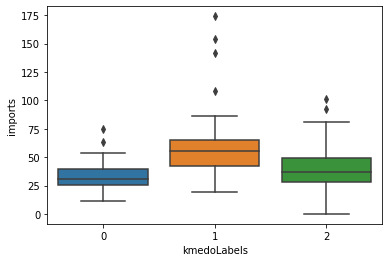

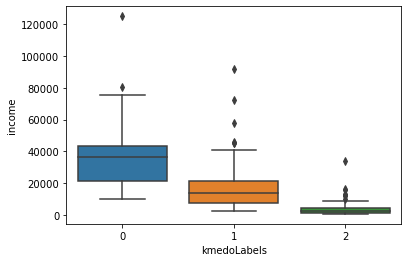

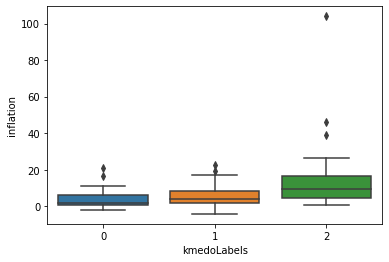

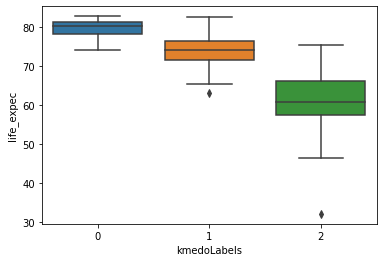

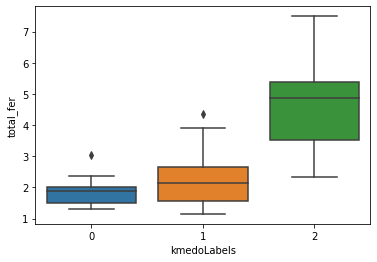

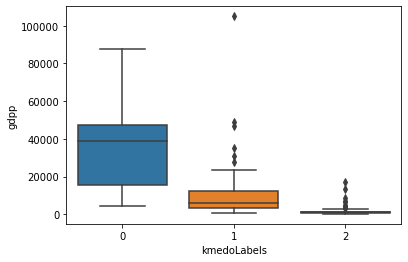

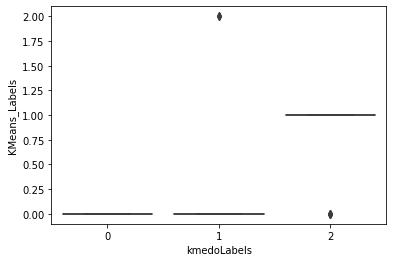

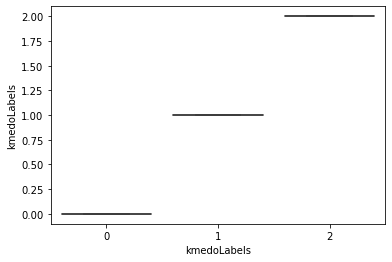

In [28]:
for col in data.columns:
    plt.figure
    sns.boxplot(x='kmedoLabels', y=col, data=data)
    plt.show()

## Observation  
* K-Medoids is more evenly distributed in comparison to K-Means clustering, because KMedoids are less affected by outliers from data. 

# Gaussian Mixture Model

In [29]:
#model, fit and then predict
gmm = GaussianMixture(n_components=3, random_state=1)
gmm.fit(scale_data)
scale_data_copy['GmmLabels'] = gmm.predict(scale_data)
#Adding the gaussian mixture predict model into original data

data['GmmLabels'] = gmm.predict(scale_data)

In [30]:
data_new = data.drop(['KMeans_Labels','kmedoLabels','country'], axis=1)

In [31]:
data_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,GmmLabels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [32]:
data_new.GmmLabels.value_counts()

0    67
2    62
1    38
Name: GmmLabels, dtype: int64

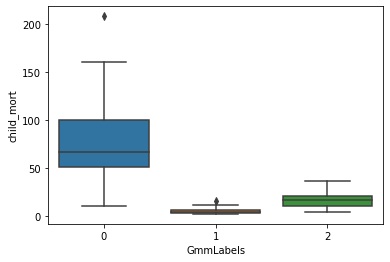

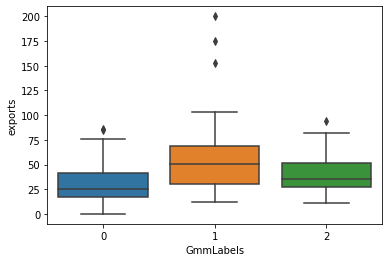

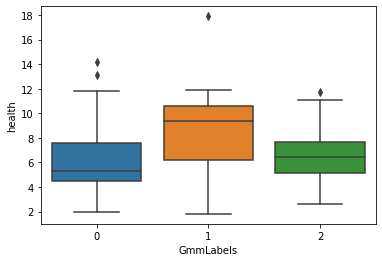

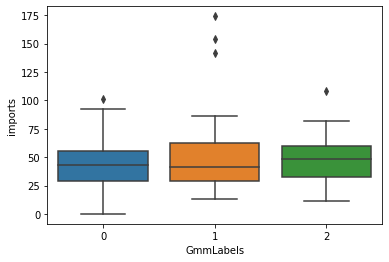

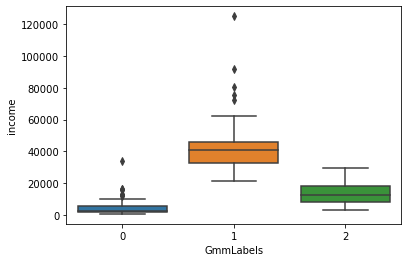

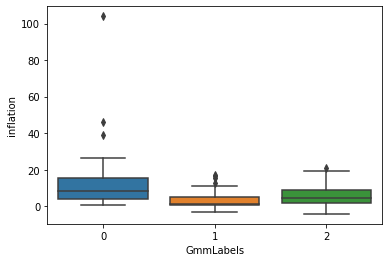

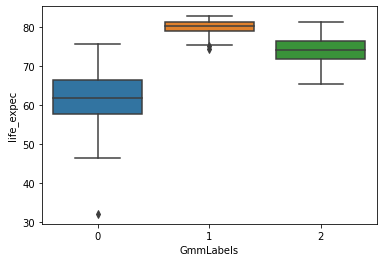

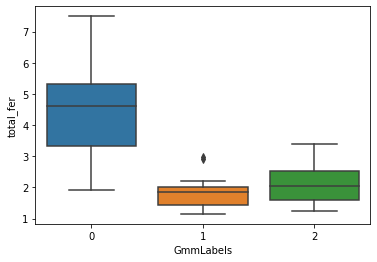

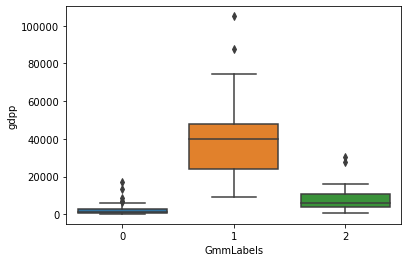

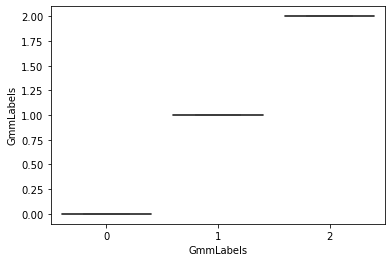

In [33]:
#Plot box plot
for col in data_new.columns:
    
    sns.boxplot(x='GmmLabels', y=col, data=data_new)
    plt.show()

In [34]:
#calculate statistical description
feature = data_new.columns
mean = data_new.groupby('GmmLabels').mean()
median = data_new.groupby('GmmLabels').median()
df_gmm = pd.concat([mean,median], axis=0)
df_gmm.index = ['group_0 mean','group_1 mean','group_2_mean','group_0 median','group_1 median','group_2 median']
df_gmm.T

,group_0 mean,group_1 mean,group_2_mean,group_0 median,group_1 median,group_2 median
child_mort,76.459701,5.544737,17.058065,66.80,4.250,16.550
exports,30.704463,60.047368,40.745161,25.00,50.900,35.400
health,6.140000,8.444737,6.547419,5.30,9.405,6.440
imports,43.886058,51.736842,47.166129,42.90,40.950,48.250
income,4578.850746,45431.578947,13386.774194,2520.00,40900.000,12800.000
inflation,11.796642,3.538553,6.043968,8.43,1.395,4.465
life_expec,62.070149,79.707895,74.116129,61.80,80.200,74.150
total_fer,4.404776,1.791579,2.082419,4.60,1.850,2.040
gdpp,2235.880597,40707.105263,7553.870968,1170.00,39750.000,6240.000


### Observation. 
* GMM model create the clusters that look similar to what created with KMedoids, which slightly more distributed.  
* Group 1 belong to developed countried with highest income countries with the lowest child mortality rate, better health, highest import and export, lowest inflation, lowest fertilization rate, highest life expentency, and highest GDP.  
* Comparing of group 1 calculated from GMM and KMedoids, Median from GMM provides lower child mortality rate, lower inflation, ,lower fertility rate and higher income, higer health, higher export and import and higher GDP. Overall, the cluster has become more 'pure' in comparison to the one from K-Medoids. 
* Group 0 seem to be 'undeveloped countries' The median have all imporve from KMedoids cluster, which indicated the cluster 0 have become less 'pure' (Less serious).   
* Group 2 is a mix between developed and undeveloped countries 

# Hierachical Clustering. 
* Dissimilarity in a bottom up way
* Create clustering using Agglomerative Hierarchical clustering.  
* Decide number of cluster using a concept called "Dendogram", which is a tree like diagram that records the sewquences of merges or split

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

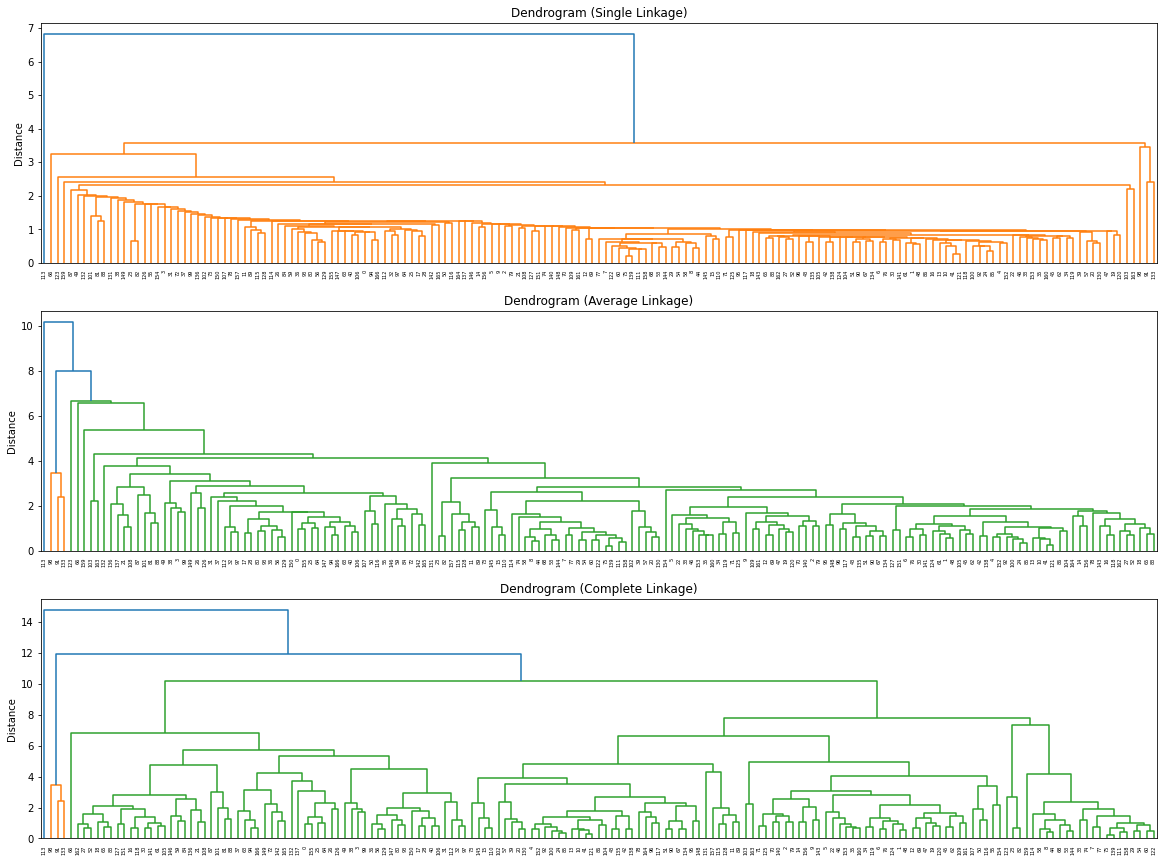

In [38]:
#List of all linkage methods to check
methods =['single',
         'average',
         'complete']

#Create subplot image 
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

#Enumerate through the list of all methods above, get linkage and plot dendogram
for i, method in enumerate(methods):
    Z = linkage(scale_data, metric='euclidean', method = method)
    dendrogram(Z, ax = axs[i]);
    
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    
    axs[i].set_ylabel('Distance')

### Observation. 
* Complete linkage gives the clear cluster separated, thereofre it is considered to be the best. 
* We can now set a threshold distance and draw a horizontal line

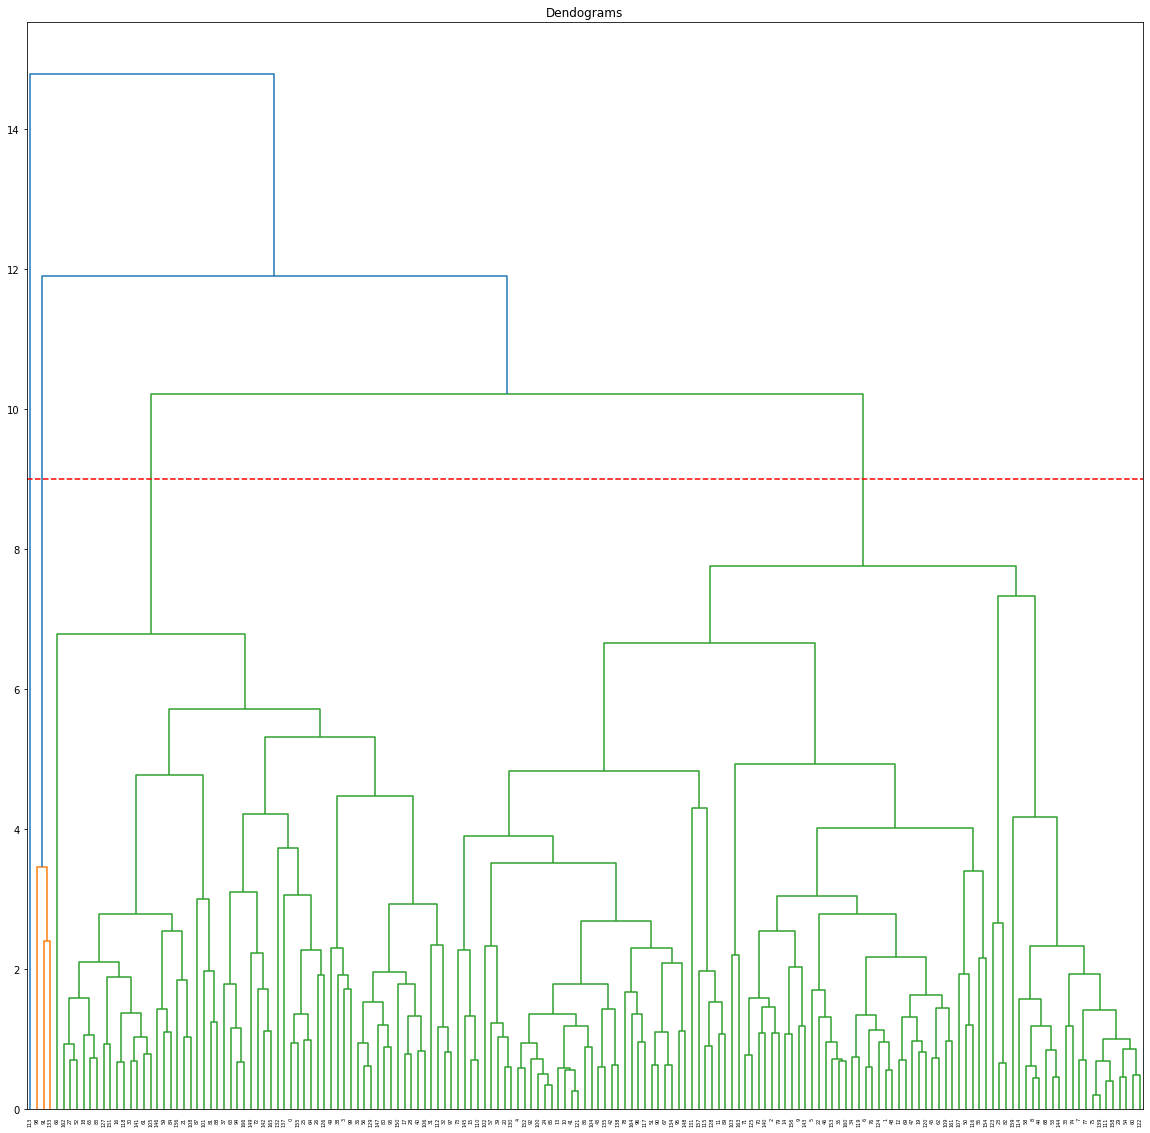

In [40]:
#Draw a horizontal line
plt.figure(figsize=(20,20))
plt.title("Dendograms")

dend = dendrogram(linkage(scale_data,method='complete'))
plt.axhline(y=9, color='r',linestyle='--')


### Observation. 
* Draw a horizontal line at 9 cut 4 vertical lines, so there are 4 different clusters

In [41]:
#Clustering with 4 clusters
#affinity = metric used to compute the linkage
hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage ='complete')
hier.fit(scale_data)


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [43]:
scale_data_copy['HCLabels'] = hier.labels_
data['HCLabels'] = hier.labels_

In [44]:
data.HCLabels.value_counts()

0    103
1     60
2      3
3      1
Name: HCLabels, dtype: int64

### Observation. 
* Four clusters are unevenly distributed.  

In [45]:
#Check 3 country in cluster 2
data[data.HCLabels == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2,1,1,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2,1,1,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2,1,1,2


* I got a cluster with a separate 3 small countries with the highest values for import and exports.

In [46]:
#Checking 1 country in cluster 3
data[data.HCLabels == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,1,2,0,3


* Nigeria has the inflation of 104.0 which is the hihgest inflation rate of this data set. This make its distance far away from other clusters, so we cannot merge this with other data points 

In [48]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,2,0


In [57]:
#Calculate the mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('HCLabels').mean()

median = data.groupby('HCLabels').median()

df_hier = pd.concat([mean, median], axis = 0)

df_hier.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_hier[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,16.678641,75.513333,4.133333,130.00,10.80,73.300,2.80,130.00
exports,42.532806,32.183667,176.000000,25.30,38.70,28.900,175.00,25.30
health,7.013883,6.505667,6.793333,5.07,6.91,5.685,7.77,5.07
imports,42.438504,49.535000,156.666667,17.40,38.40,47.650,154.00,17.40
income,23425.533981,4218.050000,64033.333333,5150.00,17800.00,2500.000,72100.00,5150.00
inflation,6.723262,8.261100,2.468000,104.00,4.49,5.860,3.62,104.00
life_expec,75.471845,61.740000,81.433333,60.50,76.10,61.300,81.30,60.50
total_fer,2.074660,4.477333,1.380000,5.84,1.93,4.710,1.36,5.84
gdpp,18053.689320,2174.233333,57566.666667,2330.00,10700.00,1185.000,46600.00,2330.00


In [59]:
col = data.drop(['country','KMeans_Labels','kmedoLabels','GmmLabels'], axis=1)

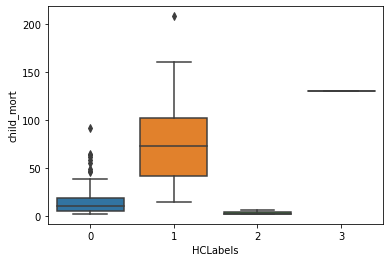

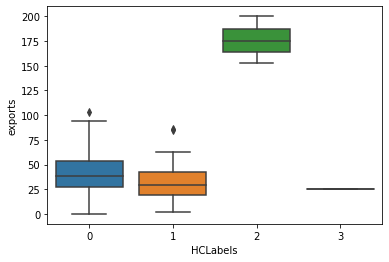

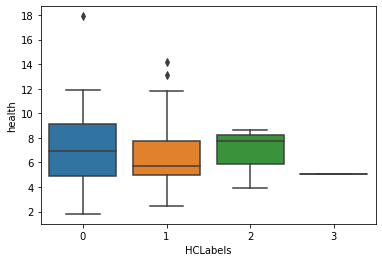

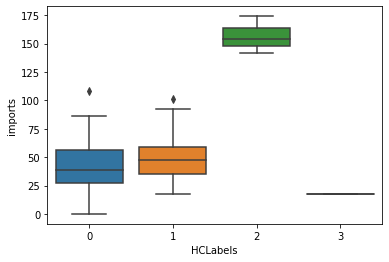

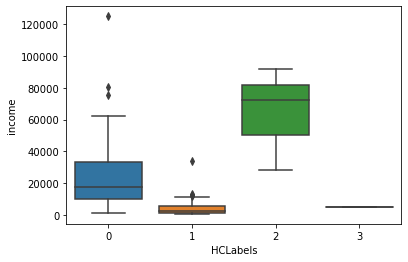

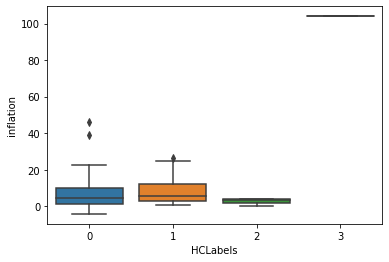

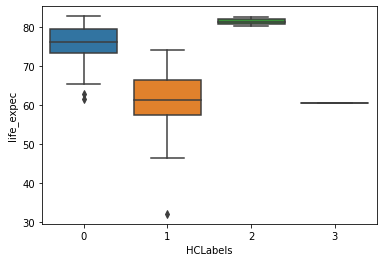

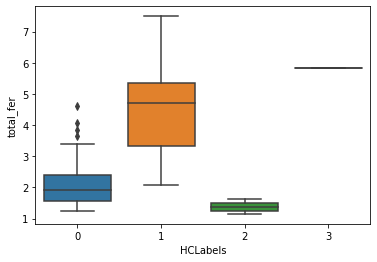

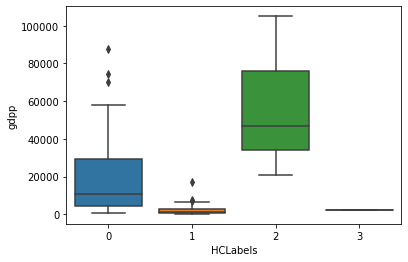

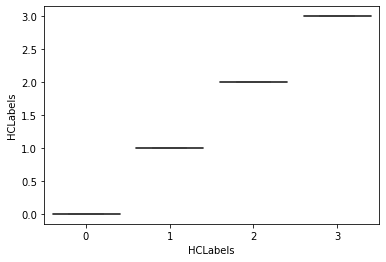

In [60]:
for col in col:
    sns.boxplot(x='HCLabels', y=col, data=data)
    plt.show()

### Observation. 
* It is hard to distinguished as they are not evenly distributed

# DBSCAN  
* It is density based spatial clustering. 
* It is not sensitive to an outlier.  

In [64]:
dbs = DBSCAN(eps=1)
scale_data_copy = dbs.fit_predict(scale_data)
#Putting DBSCAN cluster into original data
data['DBSLabels'] = dbs.fit_predict(scale_data)

In [65]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels,DBSLables,DBSLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0,1,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1,2,0,-1,-1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0,1,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,2,0,0,0


In [66]:
data['DBSLabels'].value_counts()

-1    90
 0    55
 1    17
 2     5
Name: DBSLabels, dtype: int64

In [69]:
#Calculating mean and median
mean = data.groupby('DBSLabels').mean()

median = data.groupby('DBSLabels').median()
df_dbs = pd.concat([mean,median], axis=0)
df_dbs.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_dbs.T

,group_-1 Mean,group_0 Mean,group_1 Mean,group_2 Mean,group_-1 Median,group_0 Median,group_1 Median,group_2 Median
child_mort,54.907778,17.130909,4.147059,87.340,50.900,15.70,4.100,90.20
exports,42.922211,41.525455,35.194118,24.000,36.100,37.00,29.900,22.80
health,6.254556,6.709455,10.294706,6.256,5.275,6.55,10.100,6.01
imports,48.265177,49.510909,33.982353,37.200,42.400,51.30,31.000,34.90
income,16254.611111,13433.090909,38382.352941,1785.600,5170.000,11200.00,38800.000,1610.00
inflation,11.155856,4.015527,1.309118,10.486,8.605,3.53,0.873,9.44
life_expec,67.202222,74.203636,81.076471,55.020,67.700,74.50,81.300,54.50
total_fer,3.578222,2.067455,1.708235,5.504,3.250,1.92,1.630,5.43
gdpp,10940.611111,8043.018182,43200.000000,718.600,2775.000,6250.00,41900.000,553.00
KMeans_Labels,0.588889,0.000000,0.000000,1.000,1.000,0.00,0.000,1.00


In [70]:
#Visualize it in box plot
columns = data.drop(['KMeans_Labels','country','kmedoLabels','GmmLabels','HCLabels'],axis=1)


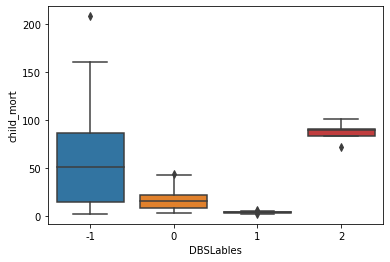

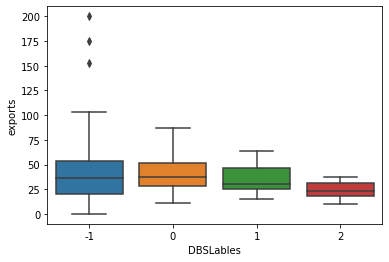

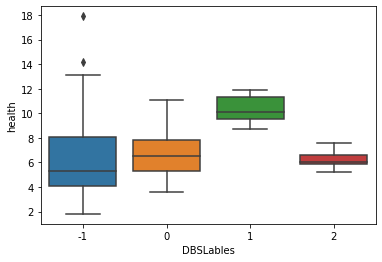

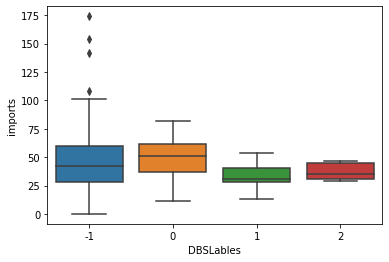

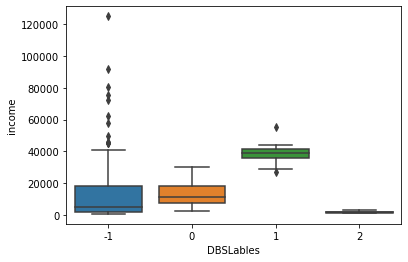

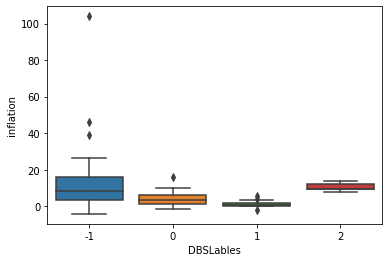

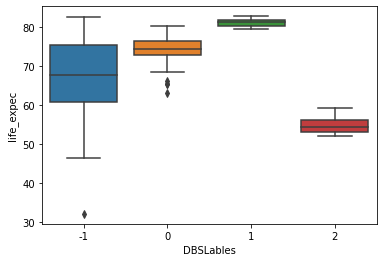

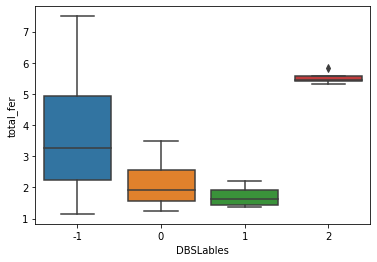

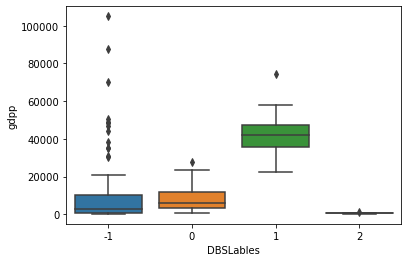

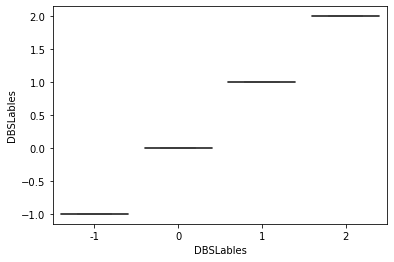

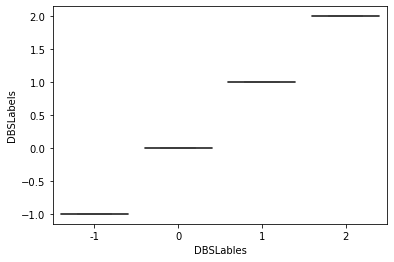

In [71]:
for col in columns:
    sns.boxplot(x='DBSLables', y=col, data=data)
    plt.show()

### Observation. 
* Cluster -1 contains extream outlier Therefore, it is not adding any value to our cluster analysis. We can explore it further to understand which type of countries it consists of.

# Conclusion. 
How to choose the clustering depends on the problems that we are studying. But for this case, KMedoids and GMM are good algorithms as it provide clusters of evenly distributed data.